In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from skimage.io import imread
from skimage.color import rgb2gray
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

Question A1. Convolution Exercise: define a signal X[i] and filters H_L[i] & H_H[i] as given below. Convolve the
filters with the signal and observe the outputs. Study the outputs and interpret the impacts of these
filters.
X = [0,1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 0, 0]
H_L = [0.05,0.2,0.5,0.2,0.05]
H_H = [-1,2,-1]
y_low = numpy.convolve(X,H_L)
y_high = numpy.convolve(X,H_H)
plt.plot(X)
plt.plot(y_low)
plt.plot(y_high)

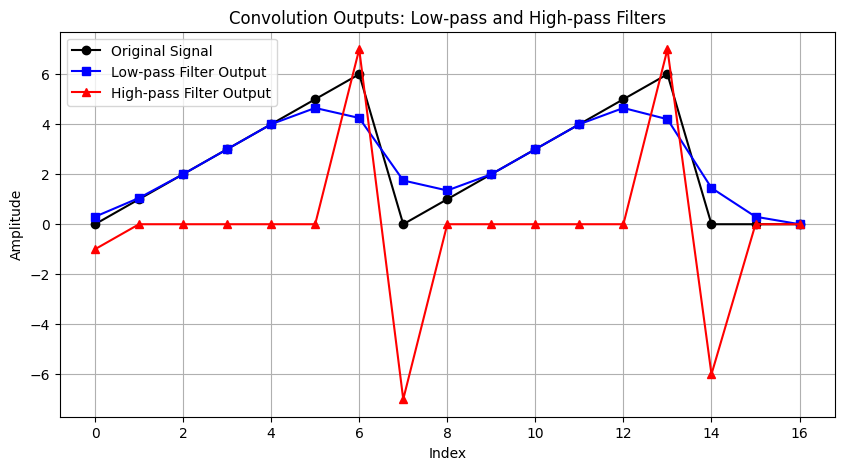

In [2]:
# Define the signal and filters
X = np.array([0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 0, 0])
H_L = np.array([0.05, 0.2, 0.5, 0.2, 0.05])  # Low-pass filter
H_H = np.array([-1, 2, -1])  # High-pass filter

# Perform convolution
y_low = np.convolve(X, H_L, mode='same')  # Low-pass filtered signal
y_high = np.convolve(X, H_H, mode='same')  # High-pass filtered signal

# Plot the original signal and filtered outputs
plt.figure(figsize=(10, 5))

plt.plot(X, label="Original Signal", linestyle='-', marker='o', color='black')
plt.plot(y_low, label="Low-pass Filter Output", linestyle='-', marker='s', color='blue')
plt.plot(y_high, label="High-pass Filter Output", linestyle='-', marker='^', color='red')

plt.xlabel("Index")
plt.ylabel("Amplitude")
plt.title("Convolution Outputs: Low-pass and High-pass Filters")
plt.legend()
plt.grid(True)

plt.show()

Question A2. Use the supplied image Neural.JPG. Define the filters as shown below. Convolve the image with
the provided filters and observe the filtered output of the image. Interpret the filter effects on the
image. You may refer to below code for help.

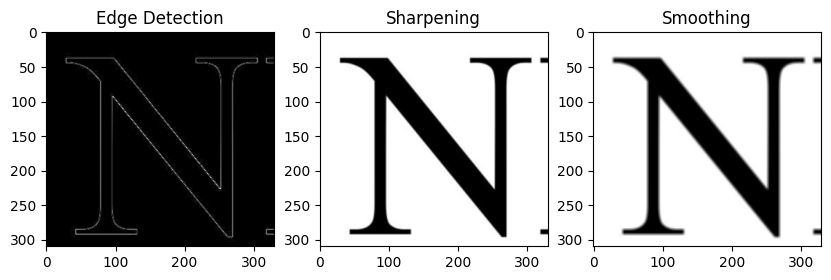

In [4]:
image_path = "/content/drive/MyDrive/Neural.JPG"  # Ensure the file is in your working directory
im = imread(image_path)
img = rgb2gray(im) * 255

img1 = img[40:350, 20:350]

fil1 = np.array([[ 0, -1,  0], [-1, 4, -1], [ 0, -1, 0]])  # Edge detection
fil2 = np.array([[ 0.2, 0.5,  0.2], [0.5, 1, 0.5], [0.2, 0.5, 0.2]])  # Sharpening
fil3 = np.ones((5, 5)) / 25  # Smoothing

grad1 = signal.convolve2d(img1, fil1, boundary='symm', mode='same')
grad2 = signal.convolve2d(img1, fil2, boundary='symm', mode='same')
grad3 = signal.convolve2d(img1, fil3, boundary='symm', mode='same')

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(abs(grad1), cmap='gray')
plt.title("Edge Detection")
plt.subplot(1, 3, 2)
plt.imshow(grad2, cmap='gray')
plt.title("Sharpening")
plt.subplot(1, 3, 3)
plt.imshow(grad3, cmap='gray')
plt.title("Smoothing")
plt.show()

In [5]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

Question A3. Design and implement a fully connected and dense network to perform classification on your
dataset. Train the network with training & validation sets.

In [12]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define dataset paths
train_dir = "/content/drive/MyDrive/skin-disease-datasaet/train_set"
test_dir = "/content/drive/MyDrive/skin-disease-datasaet/test_set"

# Image Parameters
img_size = (64, 64)  # Resize all images to 64x64
batch_size = 32

# Load images using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)  # 20% for validation
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Training data
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Validation data
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Define Fully Connected Neural Network
model = Sequential([
    Flatten(input_shape=(64, 64, 3)),  # Convert 3D image to 1D vector
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

Found 741 images belonging to 8 classes.
Found 183 images belonging to 8 classes.
Found 233 images belonging to 8 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 236s 10s/step - accuracy: 0.1583 - loss: 5.5715 - val_accuracy: 0.1366 - val_loss: 2.3525
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - accuracy: 0.1343 - loss: 2.9009 - val_accuracy: 0.1148 - val_loss: 2.0818
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 217ms/step - accuracy: 0.1229 - loss: 2.1203 - val_accuracy: 0.0929 - val_loss: 2.0889
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 248ms/step - accuracy: 0.1408 - loss: 2.1438 - val_accuracy: 0.1803 - val_loss: 2.0728
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 217ms/step - accuracy: 0.1361 - loss: 2.0745 - val_accuracy: 0.1803 - val_loss: 2.0712
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 272ms/step - accuracy: 0.1524 - loss: 2.0721 - val_accuracy: 0.1148 - val_loss: 2.0719
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 208ms/step - accuracy: 0.1420 - loss: 2.0687 - val_accuracy: 0.1421 - val_loss: 2.0689
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 275ms/step - accuracy: 0.1655 - loss: 2.0580 - val_accuracy: 

Question A4. Make a plot of training loss and validation loss to check for the regular fit of the trained network.

In [13]:
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 354ms/step - accuracy: 0.1369 - loss: 2.0630 - val_accuracy: 0.1530 - val_loss: 2.0646
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accuracy: 0.1347 - loss: 2.0661 - val_accuracy: 0.1694 - val_loss: 2.0626
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 273ms/step - accuracy: 0.1368 - loss: 2.0506 - val_accuracy: 0.1639 - val_loss: 2.0635
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 214ms/step - accuracy: 0.1548 - loss: 2.0570 - val_accuracy: 0.1475 - val_loss: 2.0633
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 274ms/step - accuracy: 0.1795 - loss: 2.0533 - val_accuracy: 0.1475 - val_loss: 2.0620
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - accuracy: 0.1590 - loss: 2.0555 - val_accuracy: 0.1858 - val_loss: 2.0586
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 251ms/step - accuracy: 0.1753 - loss: 2.0501 - val_accuracy: 0.1639 - val_loss: 2.0562
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 238ms/step - accuracy: 0.1646 - loss: 2.0473 - val_accuracy: 0.

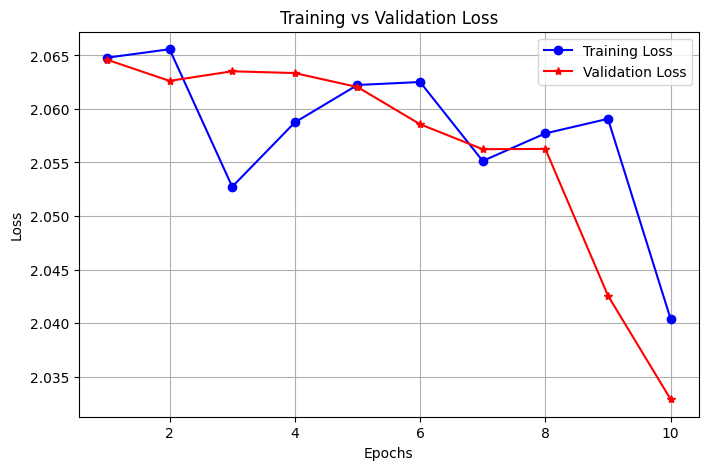

In [14]:
import matplotlib.pyplot as plt

# Extract training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plot Training vs Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, 'bo-', label="Training Loss")
plt.plot(epochs, val_loss, 'r*-', label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

Question A5. Test the network with your test set and observe the metrics.

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 0.1878 - loss: 2.0407
Test Accuracy: 0.1845
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step

Classification Report:
                             precision    recall  f1-score   support

            BA- cellulitis       0.20      0.30      0.24        33
               BA-impetigo       1.00      0.00      0.00        20
           FU-athlete-foot       1.00      0.00      0.00        32
            FU-nail-fungus       1.00      0.00      0.00        33
               FU-ringworm       1.00      0.00      0.00        23
PA-cutaneous-larva-migrans       1.00      0.00      0.00        25
             VI-chickenpox       0.15      0.82      0.26        34
               VI-shingles       1.00      0.00      0.00        33

                  accuracy                           0.16       233
                 macro avg       0.79      0.14      0.06       233
              weighted avg       0.76      0.16      0.07       233



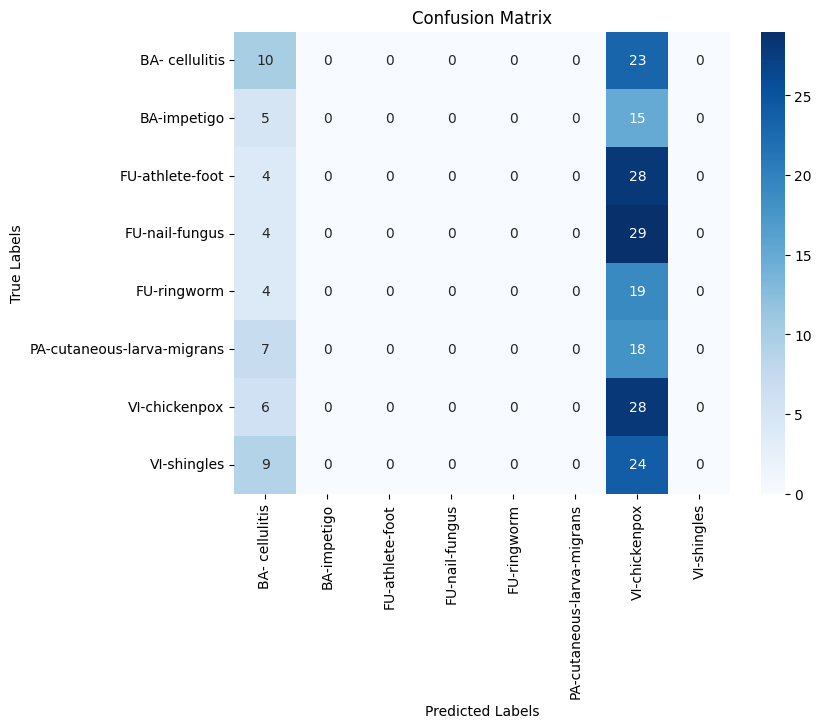

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

# Get predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = test_generator.classes  # True labels

# Generate classification report
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys(), zero_division=1)
print("\nClassification Report:\n", report)


# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()